# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities is a list and we jsut want 1 city

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# Starting URL for Weather Map API Call
#url = f"http://api.openweathermap.org/data/2.5/forecast?APPID={api_key}"
url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}"

#create a list of 500 ciites with clouds, temp, lat, long, humity, wind speed data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for i in cities:
    
    try:
        
        #print(f"{url}&q={i}")

        #run a city from the cities list to get the weather infomration
        response = requests.get(f"{url}&q={i}").json()
        #print(json.dumps(response, indent=4, sort_keys=True))

        #store variables
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
    except:
        print(f"Skipping {i}")
        

Skipping attawapiskat
Skipping barentsburg
Skipping taolanaro
Skipping samusu
Skipping illoqqortoormiut
Skipping mys shmidta
Skipping marcona
Skipping tsihombe
Skipping tuggurt
Skipping toliary
Skipping severnyy
Skipping haibowan
Skipping sofiysk
Skipping yomitan
Skipping yirol
Skipping saleaula
Skipping skagastrond
Skipping grand river south east
Skipping vaitupu
Skipping sentyabrskiy
Skipping bengkulu
Skipping belushya guba
Skipping maneadero
Skipping ambodifototra
Skipping dzhusaly
Skipping lolua
Skipping khormuj
Skipping nizhneyansk
Skipping tarudant
Skipping ozgon
Skipping bokoro
Skipping yambio
Skipping dubenskiy
Skipping sinkat
Skipping burkhala
Skipping asau
Skipping umzimvubu
Skipping aflu
Skipping kousseri
Skipping sataua
Skipping mutsamudu
Skipping palabuhanratu
Skipping virapandi
Skipping sakakah
Skipping karakendzha
Skipping yuancheng
Skipping andselv
Skipping kamenskoye
Skipping tahta
Skipping tumannyy
Skipping karaul
Skipping olafsvik
Skipping labutta
Skipping suao
Skipp

In [ ]:
# print(f"Processing Record {record} | {city_record}")
# print(f"{url}&q={city}")



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
#have a bunch of lists and need to convert into DF

city_df = pd.DataFrame({"City Name": city_name, "Cloudiness": cloudiness, "Country": country,
                        "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lng, "Temp": max_temp,
                       "Wind": wind_speed})

city_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind
0,Adrar,0,DZ,1562474886,10,27.87,-0.29,303.150,5.70
1,Seydi,35,NE,1562475469,56,13.34,7.75,301.891,7.21
2,Barrow,0,AR,1562475469,77,-38.31,-60.23,276.891,4.58
3,Talnakh,40,RU,1562475470,55,69.49,88.39,289.150,7.00
4,Mackay,90,CA,1562475470,93,53.65,-115.58,288.150,2.10


In [35]:
city_df.to_csv('city_weather.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

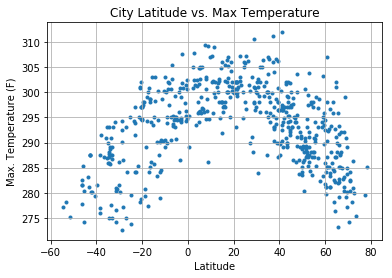

In [36]:
plt.scatter(city_df["Lat"], city_df["Temp"], marker="o", s=9)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

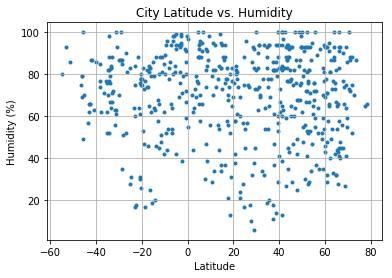

In [37]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", s=9)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

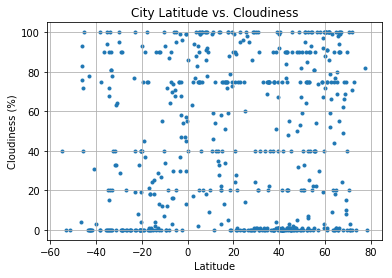

In [38]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", s=9)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

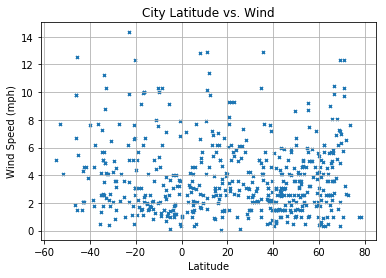

In [40]:
plt.scatter(city_df["Lat"], city_df["Wind"], marker="x", s=9)

plt.title("City Latitude vs. Wind")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()